### This notebook demonstrates typical usages of OSCAR

First, define the problem of interest with `qiskit_optimization`, `qiskit_finance`, or `docplex.mp`.

In [21]:
import networkx as nx
from qiskit_optimization.applications import Maxcut

n = 8
graph = nx.random_regular_graph(3, n)
problem = Maxcut(graph).to_quadratic_program()
H, offset = problem.to_ising() # construct the Hamiltonian

Define the desired variational quantum algorithm with `qiskit`.

OSCAR supports both the old `VQE` and `QAOA` that are being deprecated and the new `VQE`, `SamplingVQE`, and `QAOA` that use the `Estimator` and `Sampler` primitives.

In [22]:
# Old
from qiskit_aer import AerSimulator
from qiskit.algorithms import QAOA as OldQAOA
from qiskit.algorithms.optimizers import COBYLA

algorithm = OldQAOA(COBYLA(), quantum_instance=AerSimulator())

/tmp/ipykernel_20785/517059441.py:6: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  algorithm = OldQAOA(COBYLA(), quantum_instance=AerSimulator())


In [23]:
# New
from qiskit_aer.primitives import Sampler
from qiskit.algorithms.minimum_eigensolvers import QAOA as NewQAOA

algorithm = NewQAOA(Sampler(), COBYLA())

Define the landscape with parameter resolutions (granularity) and parameter bounds.

The order of the parameters corresponds to their order in the VQA ansatz definition. In the case of qiskit QAOA, the order is all betas and then all gammas.

In [24]:
from oscar import Landscape, QiskitExecutor, BPDNReconstructor
from math import pi

landscape = Landscape([64, 64], [(-pi / 4, pi / 4), (-pi / 2, pi / 2)])

Define an executor responsible for computing the landscape data with the previously constructed VQA and Hamiltonian and generate the sampled points.

In [25]:
executor = QiskitExecutor(algorithm, H)
landscape.run_after_sample(executor, sampling_fraction = 1 / 16)
len(landscape.sampled_landscape)

256

Reconstruct the full landscape with a desired Reconstructor and visualize the reconstructed landscape.

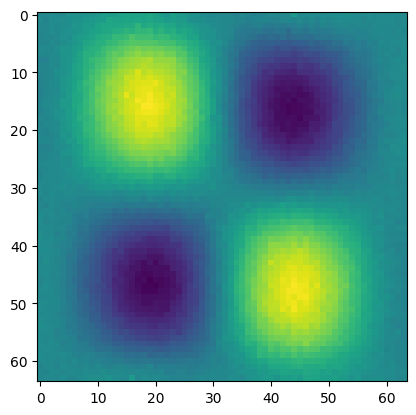

In [26]:
import matplotlib.pyplot as plt

landscape.reconstruct(BPDNReconstructor(solver = None)) # choose and config a desired cvxpy solver
plt.imshow(landscape.reconstructed_landscape)

Run the true landscape and compare.

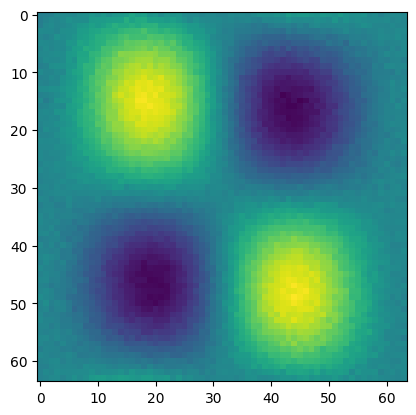

In [27]:
landscape.run_all(executor)
plt.imshow(landscape.true_landscape)